##**Project name: Product Personalisation** 

**Problem Statement :** Predict which offers will be most attractive to each individual customer, resulting in more targeted marketing campaigns and higher brand value.

#**Importing Essential Libraries**

In [ ]:
import pandas as pd   #data preprocessing
import numpy as np    #linear algbra
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle

#**Loading the Data**

In [ ]:
dataset=pd.read_csv('user_product_attraction.csv')    #reading the dataset

In [ ]:
dataset.head()   #displaying top five rows in the dataset

,Customer_Name,Gender,Salary,Area,Sub_category,Brand,Price,Quantity,Order Date,Recency,History,Offer,Profit
0,James Butt,Male,52032.70,Surburban,Sports Cloths,York,2999,1,11-08-2016,10,3467.1,69% off,41.9136
1,Josephine Darakjy,NaN,35753.37,Rural,Sports Cloths,York,1499,1,11-08-2016,6,3542.7,66% off,219.5820
2,Art Venere,Male,64486.29,Surburban,Sports Cloths,York,2999,1,06-12-2016,7,6019.3,68% off,6.8714
3,Lenna Paprocki,Male,57025.66,Rural,Sports Cloths,York,2999,1,10-11-2015,9,2422.0,69% off,-383.0310
4,Donette Foller,Male,57130.99,Urban,Sports Cloths,York,2999,1,10-11-2015,2,18638.9,68% off,2.5164


In [ ]:
dataset.shape   #size of the dataset

(26110, 13)

In [ ]:
dataset.columns  #columns for the dataset

Index(['Customer_Name', 'Gender', 'Salary', 'Area', 'Sub_category', 'Brand',
       'Price', 'Quantity', 'Order Date', 'Recency', 'History', 'Offer',
       'Profit'],
      dtype='object')

In [ ]:
# displaying null values and unique values in the dataset
temp=pd.DataFrame({'null_values': dataset.isnull().sum(),'number_of_unique values' : dataset.nunique()})

In [ ]:
temp

,null_values,number_of_unique values
Customer_Name,0,2798
Gender,118,2
Salary,131,25142
Area,49,3
Sub_category,44,12
Brand,0,156
Price,0,476
Quantity,0,6
Order Date,0,1434
Recency,0,12


In [ ]:
dataset.dtypes   #datatype of columns

Customer_Name     object
Gender            object
Salary           float64
Area              object
Sub_category      object
Brand             object
Price              int64
Quantity           int64
Order Date        object
Recency            int64
History          float64
Offer             object
Profit           float64
dtype: object

#####**Describe Function is useful to get information about the categorical as well as the continous variable mainly about the continous variables.**

In [ ]:
dataset.describe()   

,Salary,Price,Quantity,Recency,History,Profit
count,25979.000000,26110.000000,26110.000000,26110.000000,26110.000000,26110.000000
mean,41128.062901,1506.991038,1.284604,5.780276,14378.126622,28.086106
std,24248.827964,962.817694,0.631137,3.518452,14729.495218,226.539238
min,500.000000,199.000000,1.000000,1.000000,0.000000,-6599.978000
25%,22795.775000,899.000000,1.000000,2.000000,4030.250000,1.764000
50%,42242.200000,1299.000000,1.000000,6.000000,9672.600000,8.674400
75%,58337.465000,1800.000000,1.000000,9.000000,19746.300000,29.302000
max,218157.880000,12999.000000,6.000000,12.000000,152392.800000,8399.976000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


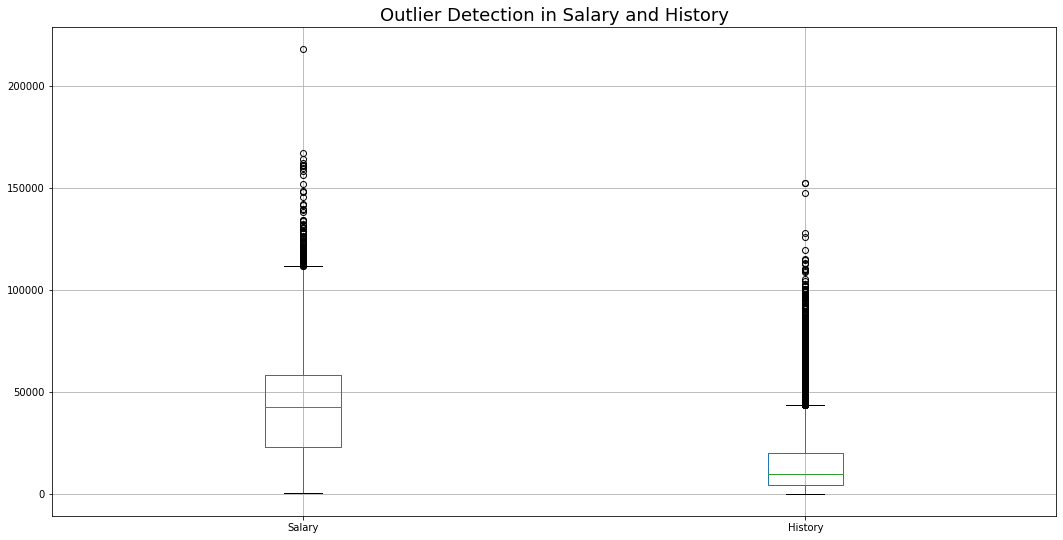

In [ ]:
#Outlier detection using boxplot in Salary and History
num_cols = ['Salary','History']
plt.figure(figsize=(18,9))
dataset[num_cols].boxplot()
plt.title("Outlier Detection in Salary and History", fontsize=18)
plt.show()

In [ ]:
#Replacing outliers in Salary with the mean Salary value
dataset.loc[dataset['Salary'] > 110000,'Salary']=np.mean(dataset['Salary'])

In [ ]:
#Removing the outliers from the dataset
dataset=dataset[dataset['History']<40000]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


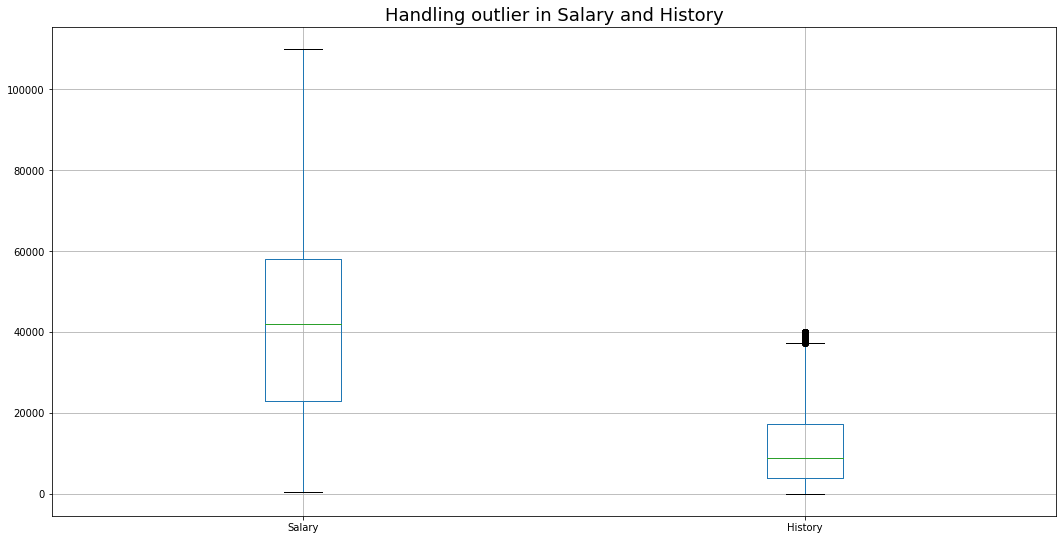

In [ ]:
num_cols = ['Salary','History']
plt.figure(figsize=(18,9))
dataset[num_cols].boxplot()
plt.title("Handling outlier in Salary and History", fontsize=18)
plt.show()

Text(0.5, 1.0, 'Boxplot for Price')

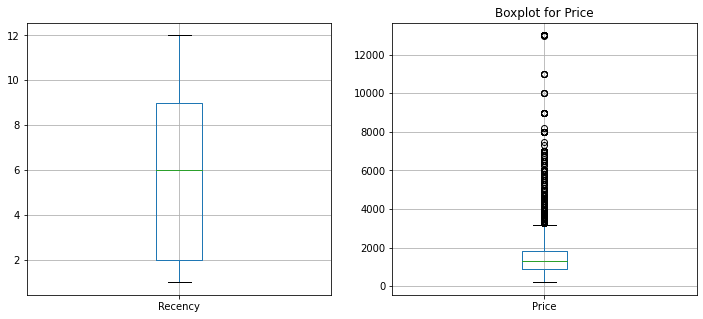

In [ ]:
#Outlier detection using boxplot in Recency and Price
fig = plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

dataset.boxplot(column=['Recency'],ax=ax1)
plt.title("Boxplot for Recency")

dataset.boxplot(column=['Price'],ax=ax2)
plt.title("Boxplot for Price")


In [ ]:
#Handling Outlier for Price
q1= 899.000000
q3= 1800.000000
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

In [ ]:
dataset=dataset[(dataset['Price'] > lower_limit) & (dataset['Price'] < upper_limit)]

Text(0.5, 1.0, 'Handling outlier in Price')

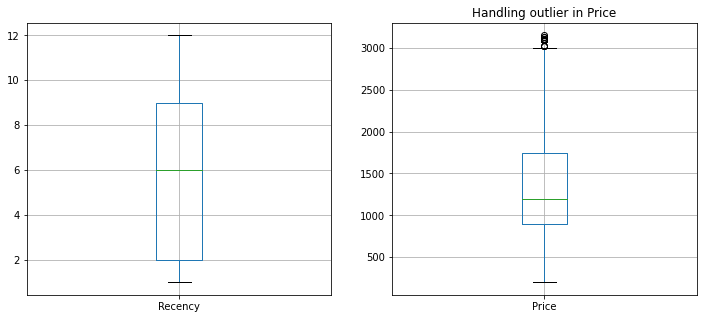

In [ ]:
fig = plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

dataset.boxplot(column=['Recency'],ax=ax1)
plt.title("Handling outlier in Recency")

dataset.boxplot(column=['Price'],ax=ax2)
plt.title("Handling outlier in Price")

[Text(0.5, 1.0, 'Histogram for Price')]

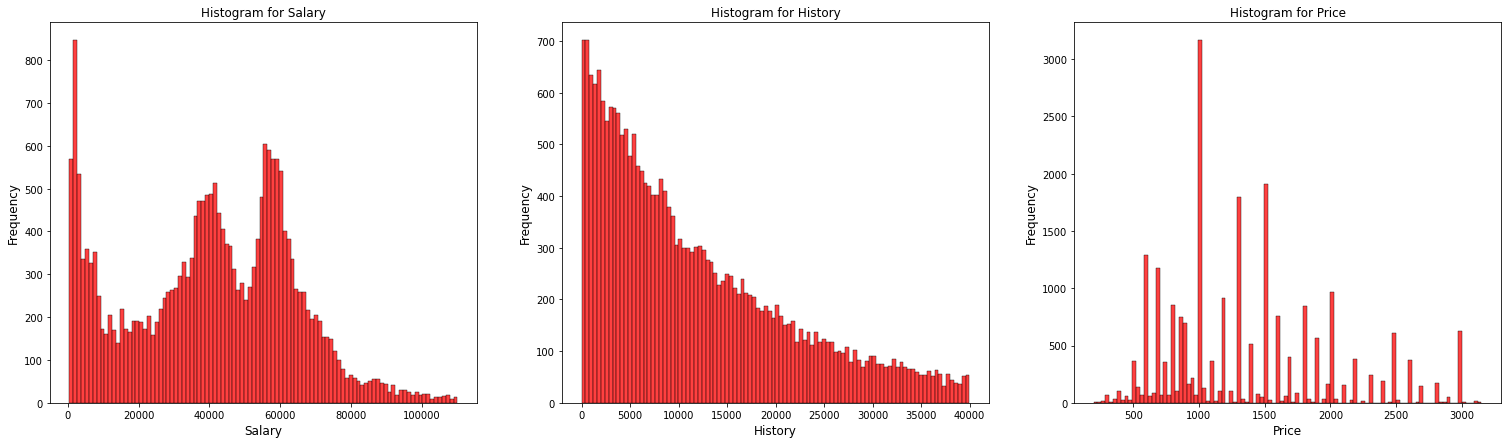

In [ ]:
# Histogram for continuous variable
fig = plt.figure(figsize=(26,7))
ax1=fig.add_subplot(131)
plt.xlabel('Salary',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
ax2=fig.add_subplot(132)
plt.xlabel('History',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
ax3=fig.add_subplot(133)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Frequency',fontsize=12)


sns.histplot(data=dataset, x='Salary',color='red',ax=ax1,bins=100).set(title="Histogram for Salary")
sns.histplot(data=dataset, x='History',color='red',ax=ax2,bins=100).set(title="Histogram for History")
sns.histplot(data=dataset, x='Price',color='red',ax=ax3,bins=100).set(title="Histogram for Price")

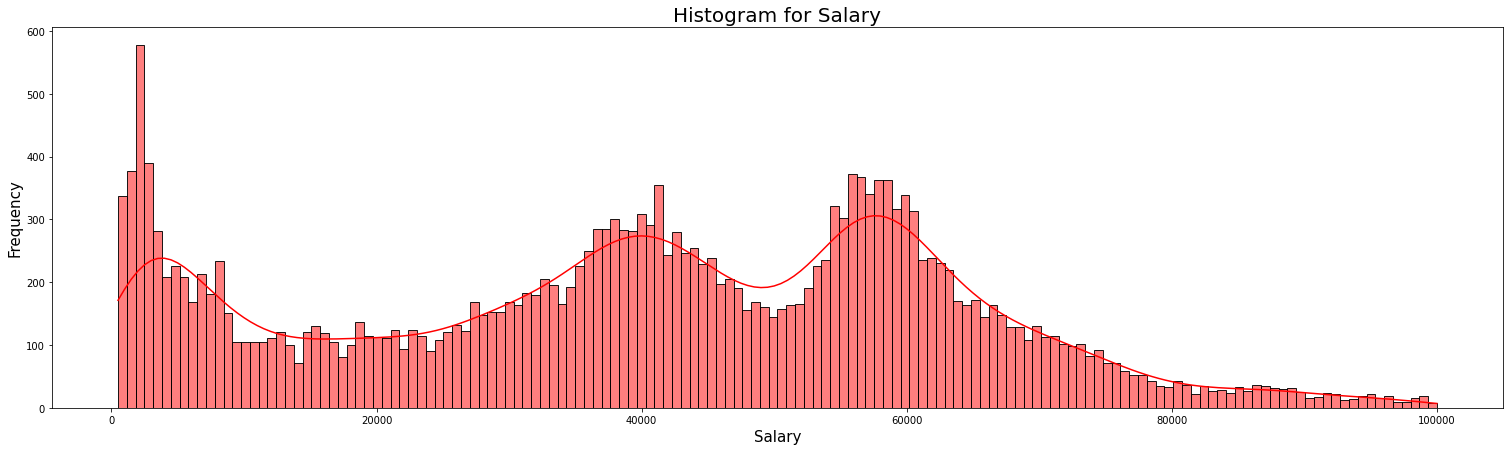

In [ ]:
#Above we can see that the Salary is left skewed so we try to make it symmetrical.
fig = plt.figure(figsize=(26,7))
plt.xlabel('Salary',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title("Histogram for Salary",fontsize=20)
sns.histplot(data=dataset, x=(dataset['Salary'].loc[dataset['Salary']<100000]),color='red',bins=150,kde=True)

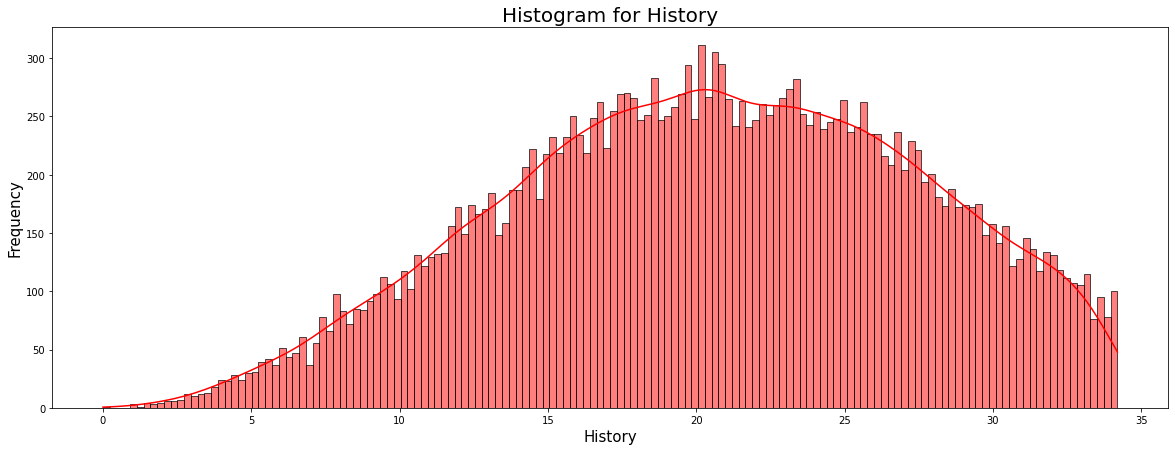

In [ ]:
#Above we can see that the History is right skewed so we try to make it symmetrical.
fig = plt.figure(figsize=(20,7))
plt.xlabel('History',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title("Histogram for History",fontsize=20)
sns.histplot(data=dataset, x=np.power(dataset['History'],1/3),bins=150,color='red',kde=True)

In [ ]:
#Creating frequency tablee for categorical variable for sub_category
dataset['Sub_category'].value_counts()

Casual Cloths       12867
Sports Cloths        2941
Suits                1990
Men's Footwear       1512
Women's Footwear     1360
Slippers             1050
Skin Care             940
Face Care             120
Hair Care             115
Perfumes               94
Luggage Bag            75
Shopping Bag           63
Name: Sub_category, dtype: int64

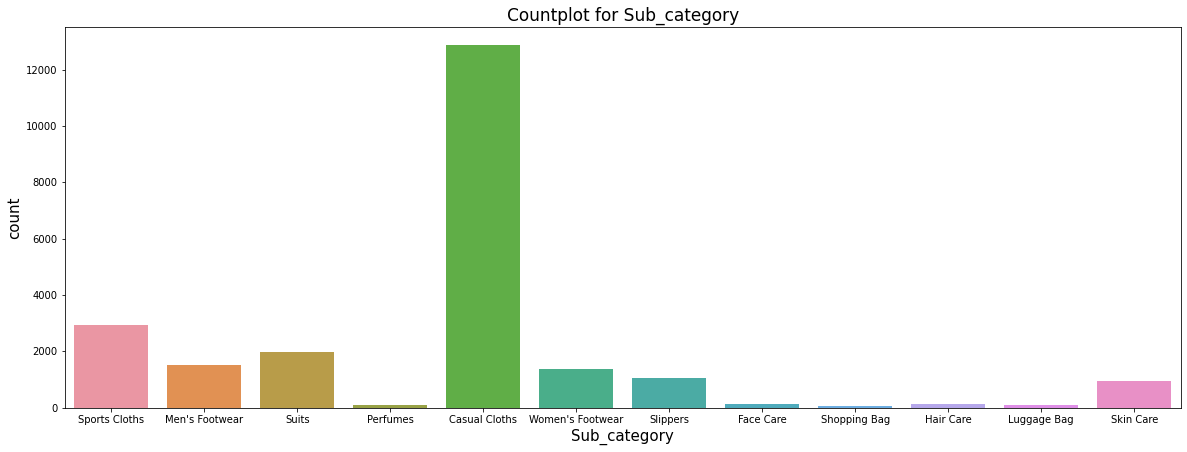

In [ ]:
#Creating countplot for sub_category
fig = plt.figure(figsize=(20,7))
plt.title('Countplot for Sub_category',fontsize=17)
plt.xlabel('Sub_category',fontsize=15)
plt.ylabel('Count',fontsize=15)
sns.countplot(x='Sub_category',data=dataset)

In [ ]:
#Creating frequency tablee for categorical variable for area
dataset['Area'].value_counts()

Surburban    10424
Urban         9273
Rural         3427
Name: Area, dtype: int64

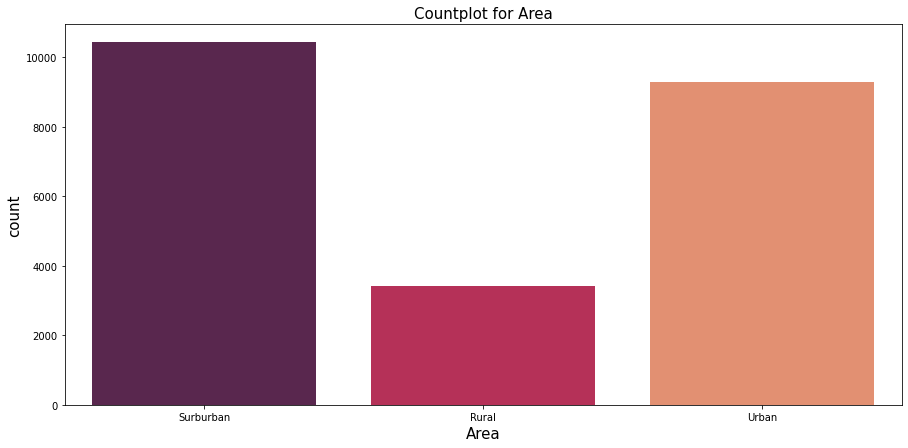

In [ ]:
#Creating countplot for area
fig = plt.figure(figsize=(15,7))
plt.title('Countplot for Area',fontsize=15)
plt.xlabel('Area',fontsize=15)
plt.ylabel('Count',fontsize=15)
sns.countplot(x='Area',data=dataset,palette='rocket')

In [ ]:
#Creating frequency tablee for categorical variable for gender
dataset['Brand'].value_counts()

ARBO            965
Ecko_Unl        874
Free_Authori    814
REEB            728
True_Bl         675
               ... 
LIVST            18
CLOTH            18
MODERN_CR        18
G                10
Sherr             2
Name: Brand, Length: 156, dtype: int64

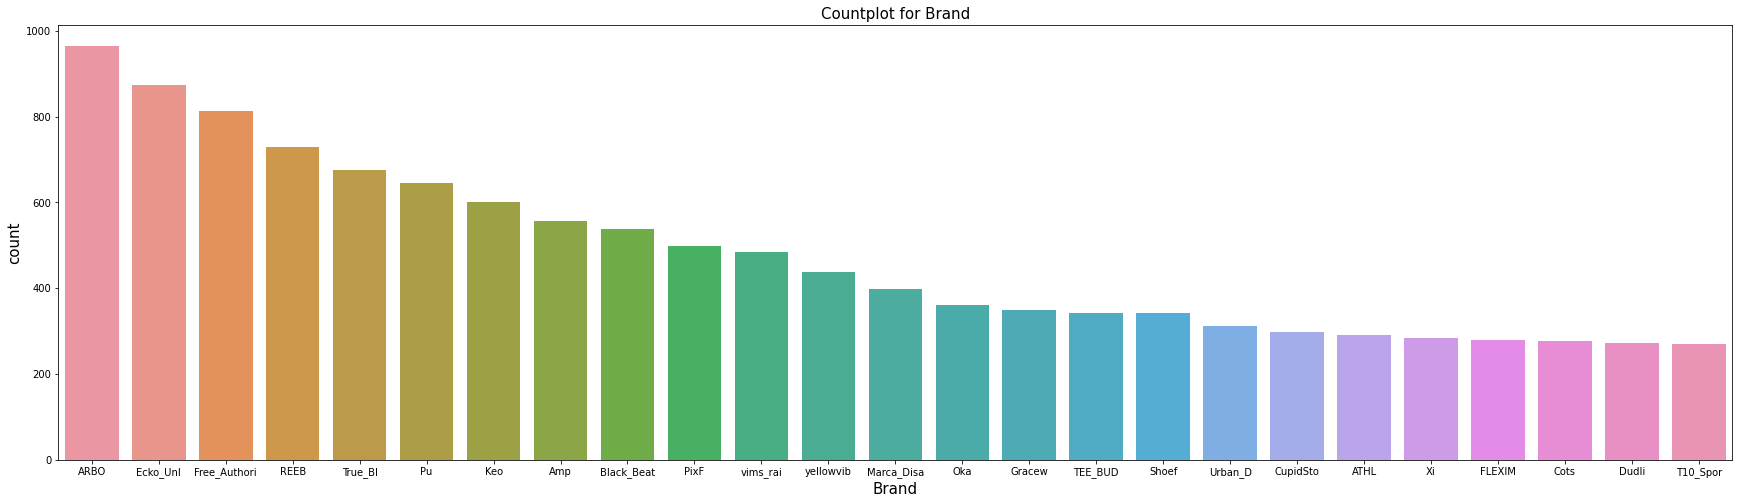

In [ ]:
#Creating countplot for gender
fig = plt.figure(figsize=(30,8))
plt.title('Countplot for Brand',fontsize=15)
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Count',fontsize=15)
# sns.countplot(x='Brand',data=dataset)
sns.countplot(x='Brand',data=dataset,order=pd.value_counts(dataset['Brand']).iloc[:25].index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


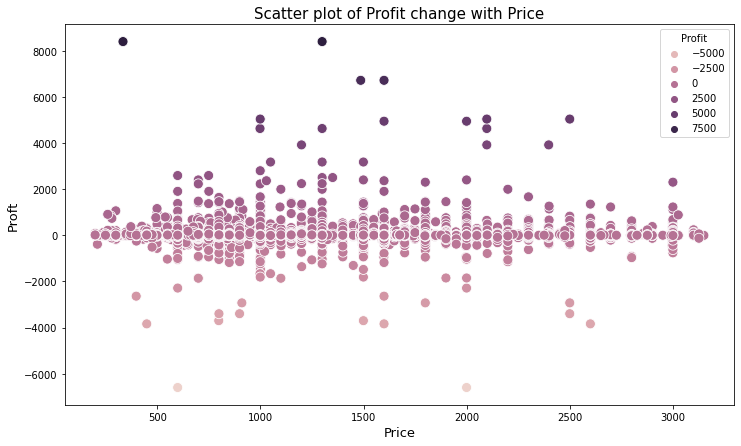

In [ ]:
#Plotting profit change with price
plt.figure(figsize=(12,7))
plt.title("Scatter plot of Profit change with Price",fontsize=15)
plt.xlabel('Price',fontsize=13)
plt.ylabel('Proft',fontsize=13)
sns.scatterplot(dataset.Price, dataset.Profit, hue=dataset.Profit, s=100)
plt.show()

In [ ]:
#Replacing outliers in profit with the mean profit value
dataset.loc[(dataset['Profit']>8000) | (dataset['Profit']<-6000),'Profit']=np.mean(dataset['Profit'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


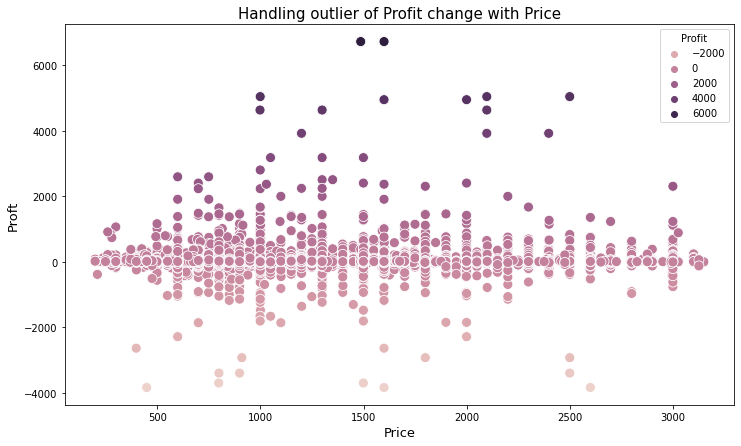

In [ ]:
#Handling outlier of profit change with price
plt.figure(figsize=(12,7))
plt.title("Handling outlier of Profit change with Price",fontsize=15)
plt.xlabel('Price',fontsize=13)
plt.ylabel('Proft',fontsize=13)
sns.scatterplot(dataset.Price, dataset.Profit, hue=dataset.Profit, s=100)
plt.show()

In [ ]:
#Groupby sub_category with profit
total=dataset.groupby('Sub_category')['Profit'].mean().reset_index() 
total

,Sub_category,Profit
0,Casual Cloths,26.851102
1,Face Care,-0.570385
2,Hair Care,40.058276
3,Luggage Bag,7.877181
4,Men's Footwear,32.178167
5,Perfumes,35.273333
6,Shopping Bag,44.437159
7,Skin Care,45.252489
8,Slippers,32.887750
9,Sports Cloths,26.930234


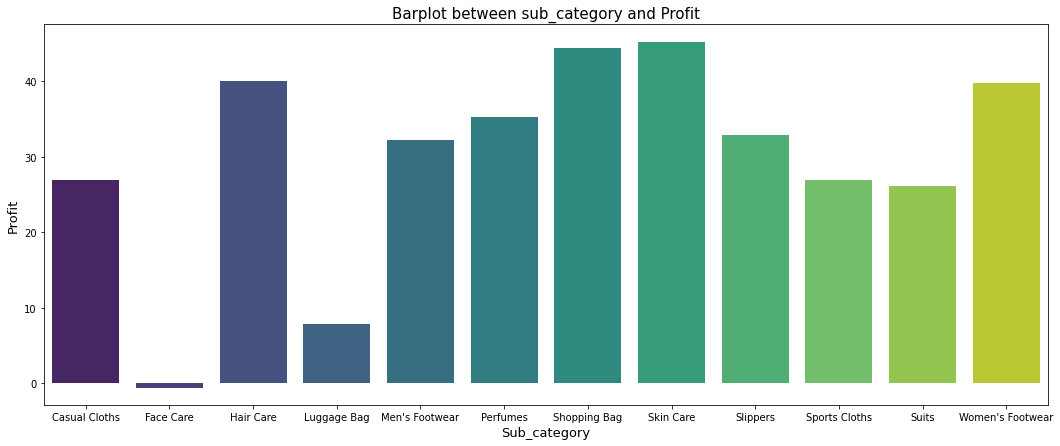

In [ ]:
#Barplot between sub_category and profit
plt.figure(figsize=(18,7))
plt.title("Barplot between sub_category and Profit",fontsize=15)
plt.xlabel('Sub_category',fontsize=13)
plt.ylabel('Profit',fontsize=13)
sns.barplot(x='Sub_category',y='Profit',data=total,palette="viridis")

In [ ]:
#Two-way-table between sub_category and brand
pd.crosstab(dataset['Sub_category'],dataset['Brand'])

Brand,A,ABC_ANY_BUDY_CLE,ARBO,AS_Tre,ATHL,ATTIITU,AXMA,A_J_Styl,Adam_Park,Amp,Asa,Bindass_Bo,BlackSN,Black_Beat,Black_Bull_Design_Stud,BlueSha,Bone,Bonnevil,Breakboun,Bumm,Byford_by_Pantaloo,CA,CANTAB,CLOTH,Cher,Clo,Cots,Crocks_Cl,CupidSto,DISCOUNT_OUTL,Dudli,East_I,Ecko_Unl,EverLa,FASHION_WOU,FLEXIM,FOOT_F,FOREVER_YOU,Fairdea,FancyW,...,ShreeR,Simon_Rob,Sketch_Vib,Solid_Styl,Steenb,Styleska,Szto,T10_Spor,TEE_BUD,TOM_BU,TeeMoo,Tees_Collecti,The_Arch,The_HOLLAND,True_Bl,Truemo,US_POLO_ASS,US_POLO_Associati,US_Polo_As,Uber_Urb,Urban_D,V,VARTe,VOXA,Vector,Wab,Welwe,Wildst,Xi,York,ZACK_Fo,adidas_Origina,allan_pet,chawla_fashi,dream_o,limited_colou,rockha,saltla,vims_rai,yellowvib
Sub_category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Casual Cloths,77,25,937,47,271,82,104,81,0,379,33,71,20,333,34,1,127,64,38,18,120,141,161,18,11,51,251,49,80,0,132,69,263,12,30,123,0,30,92,55,...,24,12,22,21,183,19,27,135,333,246,59,91,0,33,175,6,56,42,15,25,105,164,0,59,152,15,33,40,281,0,0,22,0,0,63,22,60,23,145,335
Face Care,0,0,0,0,0,15,0,0,0,10,0,0,0,8,0,0,0,0,0,0,0,5,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0
Hair Care,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,10
Luggage Bag,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,9,0,2,0,3,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,9,0
Men's Footwear,39,0,2,0,0,0,9,0,0,0,0,0,8,14,0,0,0,0,5,0,0,0,0,0,0,0,16,10,0,74,0,0,343,0,0,56,0,5,13,0,...,6,0,0,0,0,1,0,0,1,0,0,0,0,55,41,0,0,0,0,0,36,3,0,0,0,0,0,0,1,0,167,11,79,0,0,0,0,21,23,0
Perfumes,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,1,0,25,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0
Shopping Bag,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Skin Care,0,0,0,0,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,27,0,0,0,...,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0,0,25,0,0,0,0,0,0,0,220,0,0,0,0,0,0
Slippers,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,125,0,0,2,0,0,5,1,0,0,125,0,10,35,13,0,20,2,0,0,0,0,...,0,0,0,82,0,0,0,0,1,1,0,0,21,0,1,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [ ]:
#Chi-Square test
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(dataset['Sub_category'],dataset['Brand']))

(69371.75107709528,
 0.0,
 1705,
 array([[1.18505254e+02, 1.44654300e+01, 5.36889999e+02, ...,
         4.00581139e+01, 2.69279543e+02, 2.43130497e+02],
        [1.10520171e+00, 1.34907251e-01, 5.00713452e+00, ...,
         3.73589311e-01, 2.51135037e+00, 2.26747957e+00],
        [1.05915164e+00, 1.29286116e-01, 4.79850391e+00, ...,
         3.58023090e-01, 2.40671077e+00, 2.17300125e+00],
        ...,
        [2.70866520e+01, 3.30635188e+00, 1.22716522e+02, ...,
         9.15605137e+00, 6.15490120e+01, 5.55721451e+01],
        [1.83279284e+01, 2.23721192e+00, 8.30349808e+01, ...,
         6.19535608e+00, 4.16465603e+01, 3.76023695e+01],
        [1.25256194e+01, 1.52894885e+00, 5.67475245e+01, ...,
         4.23401219e+00, 2.84619709e+01, 2.56981018e+01]]))

In [ ]:
#Two-way-table between gender and sub_category
pd.crosstab(dataset['Gender'],dataset['Sub_category'])

Sub_category,Casual Cloths,Face Care,Hair Care,Luggage Bag,Men's Footwear,Perfumes,Shopping Bag,Skin Care,Slippers,Sports Cloths,Suits,Women's Footwear
Gender,,,,,,,,,,,,
Female,6548,47,59,46,679,51,38,639,666,1498,963,638
Male,6255,71,55,29,832,43,25,296,379,1429,1018,719


In [ ]:
#Chi-Square test
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(dataset['Gender'],dataset['Sub_category']))

(224.71571595301222,
 5.370910252603635e-42,
 11,
 array([[6601.97263606,   60.84767407,   58.78504105,   38.67436911,
          779.15962299,   48.47187595,   32.48647005,  482.14046823,
          538.86287625, 1509.33171177, 1021.51900274,  699.74825175],
        [6201.02736394,   57.15232593,   55.21495895,   36.32563089,
          731.84037701,   45.52812405,   30.51352995,  452.85953177,
          506.13712375, 1417.66828823,  959.48099726,  657.25174825]]))

In [ ]:
#Removing punctuations from the offer
dataset['Offer']=dataset['Offer'].str.replace('% off','')

In [ ]:
#Converting datatypes from the dataset
dataset=dataset.astype({'Offer': 'int64',
                  'Order Date': 'datetime64[ns]'})

In [ ]:
dataset.dtypes

Customer_Name            object
Gender                   object
Salary                  float64
Area                     object
Sub_category             object
Brand                    object
Price                     int64
Quantity                  int64
Order Date       datetime64[ns]
Recency                   int64
History                 float64
Offer                     int64
Profit                  float64
dtype: object

##**Dealing with the missing values**

In [ ]:
#missing values from the dataset
dataset.isnull().sum()  

Customer_Name      0
Gender           104
Salary           115
Area              41
Sub_category      38
Brand              0
Price              0
Quantity           0
Order Date         0
Recency            0
History            0
Offer              0
Profit             0
dtype: int64

**Handling the missing values using SimpleImputer**

In [ ]:
#handling missing data (Replacing missing data with the mean value)  
imputer= SimpleImputer(missing_values=np.NAN,strategy='mean',fill_value=None, verbose=1, copy=True)
imputer= imputer.fit(dataset[['Salary']])
dataset[['Salary']]=imputer.transform(dataset[['Salary']])

In [ ]:
#handling missing data (Replacing missing data with the mode value)  
imputer= SimpleImputer(missing_values=np.NAN,strategy='most_frequent',fill_value=None, verbose=1, copy=True)
imputer= imputer.fit(dataset[['Gender','Area','Sub_category']])
dataset[['Gender','Area','Sub_category']]=imputer.transform(dataset[['Gender','Area','Sub_category']])

In [ ]:
dataset.isnull().sum()  

Customer_Name    0
Gender           0
Salary           0
Area             0
Sub_category     0
Brand            0
Price            0
Quantity         0
Order Date       0
Recency          0
History          0
Offer            0
Profit           0
dtype: int64

###**Segregating the Dependent and Independent variables**

In [ ]:
#Seperate features from the dataset
features=dataset[['Sub_category','Brand','Price','Quantity']]

In [ ]:
features.shape

(23165, 4)

In [ ]:
#Seperate labels from the dataset
labels=dataset[['Offer']]
labels=np.array(labels,dtype='int64').ravel()

In [ ]:
labels.shape

(23165,)

###**Encoding Categorical data using OneHotEncoding**

In [ ]:
# Encoding the Features 
encoder=ColumnTransformer([('encoder',OneHotEncoder(), [0,1])],remainder='passthrough')
features=encoder.fit_transform(features)

In [ ]:
features

<23165x170 sparse matrix of type '<class 'numpy.float64'>'
	with 92660 stored elements in Compressed Sparse Row format>

In [ ]:
#Converting sparse matrix to numpy ndarray
features=features.toarray()

In [ ]:
features

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.999e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.499e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.999e+03,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 7.990e+02,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.125e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.125e+03,
        1.000e+00]])

In [ ]:
features.shape

(23165, 170)

In [ ]:
#Displaying zeroth row from the features
features[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

**Removing redundancy columns from the features**




In [ ]:
temp1=features[:, 1:12]

In [ ]:
#Displaying zeroth row from the temp1
temp1[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
temp2=features[:, 13:]

In [ ]:
#Displaying zeroth row from the temp1
temp2[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [ ]:
#Concatenating temp1 and temp2 
features=np.concatenate((temp1,temp2), axis=1)

In [ ]:
features

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.999e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.499e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.999e+03,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 7.990e+02,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.125e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.125e+03,
        1.000e+00]])

In [ ]:
features.shape

(23165, 168)

**Splitting the dataset into the Training set and Test set**

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

In [ ]:
features_train.shape

(18532, 168)

In [ ]:
features_train

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 7.990e+02,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.599e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 9.990e+02,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 9.990e+02,
        2.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.499e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 9.990e+02,
        1.000e+00]])

In [ ]:
labels_train.shape

(18532,)

In [ ]:
labels_train

array([25, 43, 57, ..., 20, 65, 62])

In [ ]:
features_test.shape

(4633, 168)

In [ ]:
features_test

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.299e+03,
        2.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 5.990e+02,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.299e+03,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 5.690e+02,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 5.390e+02,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.799e+03,
        1.000e+00]])

In [ ]:
labels_test.shape

(4633,)

In [ ]:
labels_test

array([38, 20, 46, ..., 33, 50, 63])

**Feature Scaling using StandardScaler**

In [ ]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [ ]:
features_train

array([[-0.07216095, -0.07291271, -0.05603166, ..., -0.14154585,
        -0.88336518, -0.44913647],
       [-0.07216095, -0.07291271, -0.05603166, ..., -0.14154585,
         0.38751424, -0.44913647],
       [-0.07216095, -0.07291271, -0.05603166, ..., -0.14154585,
        -0.56564532, -0.44913647],
       ...,
       [-0.07216095, -0.07291271, -0.05603166, ..., -0.14154585,
        -0.56564532,  1.13325842],
       [-0.07216095, -0.07291271, -0.05603166, ..., -0.14154585,
         1.81725359, -0.44913647],
       [-0.07216095, -0.07291271, -0.05603166, ..., -0.14154585,
        -0.56564532, -0.44913647]])

In [ ]:
features_test

array([[-0.07216095, -0.07291271, -0.05603166, ..., -0.14154585,
        -0.08906554,  1.13325842],
       [-0.07216095, -0.07291271, -0.05603166, ..., -0.14154585,
        -1.20108504, -0.44913647],
       [-0.07216095, -0.07291271, -0.05603166, ..., -0.14154585,
        -0.08906554, -0.44913647],
       ...,
       [-0.07216095, -0.07291271, -0.05603166, ..., -0.14154585,
        -1.24874301, -0.44913647],
       [-0.07216095, -0.07291271, -0.05603166, ..., -0.14154585,
        -1.29640099, -0.44913647],
       [-0.07216095, -0.07291271, -0.05603166, ..., -0.14154585,
         0.7052341 , -0.44913647]])

#**Fit the data into the model**

###**DecisionTreeRegressor**

In [ ]:
regressor_model=DecisionTreeRegressor()
regressor_model.fit(features_train,labels_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#training score
regressor_model.score(features_train,labels_train)

0.9004738066693447

In [ ]:
#testing score
regressor_model.score(features_test,labels_test)

0.8237576309194159

In [ ]:
pred=regressor_model.predict(features_test)

In [ ]:
pred[20:30]

array([67.71428571, 76.33333333, 64.75      , 53.        , 69.        ,
       35.        , 22.4       , 59.        , 48.        , 47.36363636])

In [ ]:
labels_test[20:30]

array([67, 77, 65, 53, 69, 35, 35, 65, 48, 38])

In [ ]:
# Calculating the mean_square_error 
mean_squared_error(labels_test,pred)

47.472071248623536

In [ ]:
#Calculating the mean_absolute_error
mean_absolute_error(labels_test,pred)

3.534726412161521

In [ ]:
train_list=[]
test_list=[]
for i in range(10,100):
    reg=DecisionTreeRegressor(max_depth=i)
    reg.fit(features_train,labels_train)
    train_score=reg.score(features_train,labels_train)
    test_score=reg.score(features_test,labels_test)
    train_list.append(train_score)
    test_list.append(test_score)

Text(0, 0.5, 'SCORE')

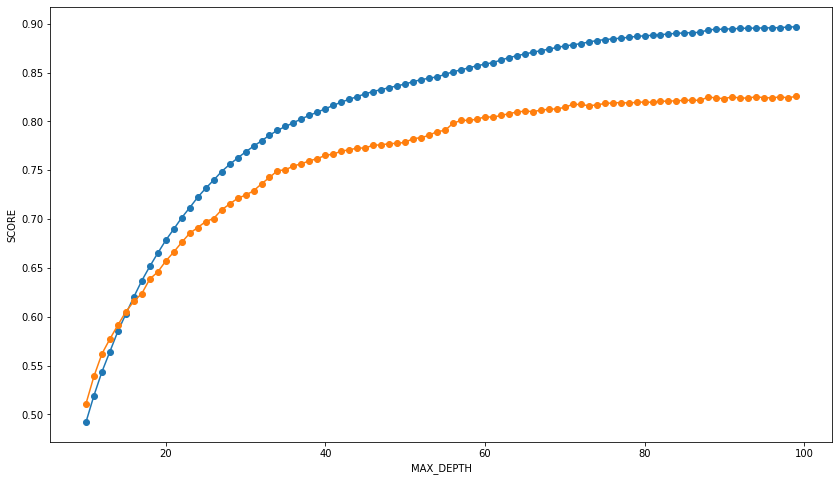

In [ ]:
x=range(10,100)
plt.figure(figsize=(14,8))
plt.plot(x,train_list,marker="o")
plt.plot(x,test_list,marker="o")
plt.xlabel("MAX_DEPTH")
plt.ylabel("SCORE")

In [ ]:
reg=DecisionTreeRegressor(max_depth=89)
reg.fit(features_train,labels_train)
train_score=reg.score(features_train,labels_train)
test_score=reg.score(features_test,labels_test)
train_score,test_score

(0.894258810608929, 0.8243305923556183)

In [ ]:
train_list=[]
test_list=[]
for i in range(2,50):
    reg=DecisionTreeRegressor(max_depth=89,min_samples_split=i)
    reg.fit(features_train,labels_train)
    train_score=reg.score(features_train,labels_train)
    test_score=reg.score(features_test,labels_test)
    train_list.append(train_score)
    test_list.append(test_score)

Text(0, 0.5, 'SCORE')

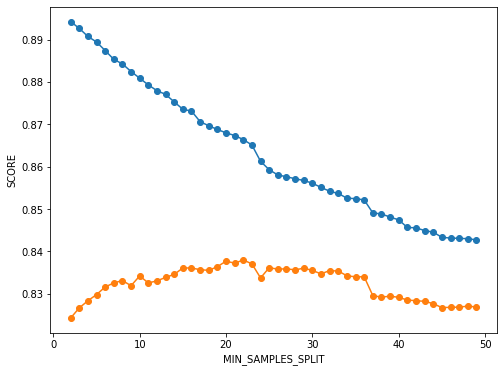

In [ ]:
x=range(2,50)
plt.figure(figsize=(8,6))
plt.plot(x,train_list,marker="o")
plt.plot(x,test_list,marker="o")
plt.xlabel("MIN_SAMPLES_SPLIT")
plt.ylabel("SCORE")

In [ ]:
reg=DecisionTreeRegressor(max_depth=89,min_samples_split=36)
reg.fit(features_train,labels_train)
train_score=reg.score(features_train,labels_train)
test_score=reg.score(features_test,labels_test)
train_score,test_score

(0.8521612874687795, 0.8340200591778407)

In [ ]:
train_list=[]
test_list=[]
for i in range(2,50):
    reg=DecisionTreeRegressor(max_depth=89,min_samples_split=35,min_samples_leaf=i)
    reg.fit(features_train,labels_train)
    train_score=reg.score(features_train,labels_train)
    test_score=reg.score(features_test,labels_test)
    train_list.append(train_score)
    test_list.append(test_score)
    

Text(0, 0.5, 'SCORE')

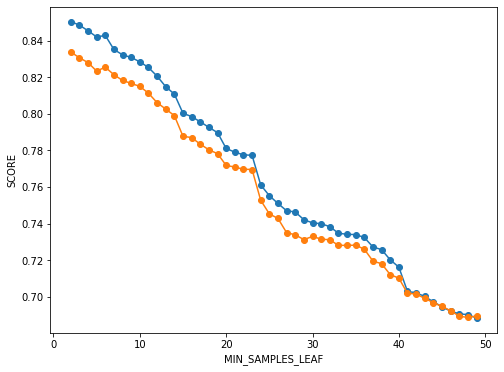

In [ ]:
x=range(2,50)
plt.figure(figsize=(8,6))
plt.plot(x,train_list,marker="o")
plt.plot(x,test_list,marker="o")
plt.xlabel("MIN_SAMPLES_LEAF")
plt.ylabel("SCORE")

In [ ]:
reg=DecisionTreeRegressor(max_depth=89,min_samples_split=36,min_samples_leaf=6)
reg.fit(features_train,labels_train)
train_score=reg.score(features_train,labels_train)
test_score=reg.score(features_test,labels_test)
train_score,test_score

(0.8427371764549191, 0.8255823997761573)

In [ ]:
pred1=reg.predict(features_test)

In [ ]:
pred1[20:30]

array([66.8       , 76.2962963 , 61.54368932, 53.        , 68.        ,
       35.        , 22.88235294, 58.42105263, 48.        , 46.05882353])

In [ ]:
labels_test[20:30]

array([67, 77, 65, 53, 69, 35, 35, 65, 48, 38])

In [ ]:
mean_squared_error(labels_test,pred1)

46.98055744503929

In [ ]:
mean_absolute_error(labels_test,pred1)

3.931849034599263

###**RandomForestRegressor**

In [ ]:
regressor=RandomForestRegressor()
regressor.fit(features_train,labels_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
regressor.score(features_train,labels_train)

0.8952029895303681

In [ ]:
regressor.score(features_test,labels_test)

0.8400740660179717

In [ ]:
y_pred=regressor.predict(features_test)

In [ ]:
y_pred[20:30]

array([67.66641481, 76.33345144, 64.82639719, 53.        , 68.99571429,
       35.        , 22.42553571, 59.14036849, 48.        , 48.8036395 ])

In [ ]:
labels_test[20:30]

array([67, 77, 65, 53, 69, 35, 35, 65, 48, 38])

In [ ]:
mean_squared_error(labels_test,y_pred)

43.07712936510843

In [ ]:
mean_absolute_error(labels_test,y_pred)

3.4975519717980745

In [ ]:
file='user_offer_attraction.pkl'
pickle.dump(regressor,open(file,'wb'))

In [ ]:
model_reg=pickle.load(open('user_offer_attraction.pkl','rb'))

In [ ]:
pred=model_reg.predict(features_test)

In [ ]:
pred[20:30]

array([67.66641481, 76.33345144, 64.82639719, 53.        , 68.99571429,
       35.        , 22.42553571, 59.14036849, 48.        , 48.8036395 ])

In [ ]:
l1=[['Shopping Bag','TEE_BUD',100,5]]

In [ ]:
df = pd.DataFrame(l1, columns=[
                  'Sub_category', 'Brand', 'Price', 'Quantity'])

In [ ]:
df

,Sub_category,Brand,Price,Quantity
0,Shopping Bag,TEE_BUD,100,5


In [ ]:
df.dtypes

Sub_category    object
Brand           object
Price            int64
Quantity         int64
dtype: object

In [ ]:
y_pred=encoder.transform(df)

In [ ]:
y_pred

<1x170 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [ ]:
y_pred=y_pred.toarray()

In [ ]:
y_pred

array([[  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [ ]:
temp1=y_pred[:, 1:12]

In [ ]:
temp1

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
temp2=y_pred[:,13:]

In [ ]:
temp2

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [ ]:
y_pred=np.concatenate((temp1,temp2), axis=1)

In [ ]:
y_pred.shape

(1, 168)

In [ ]:
y_pred=scaler.transform(y_pred)

In [ ]:
y_pred

array([[-7.21609541e-02, -7.29127110e-02, -5.60316649e-02,
        -2.61953310e-01, -6.54304722e-02,  1.84982482e+01,
        -2.02356504e-01, -2.18710872e-01, -3.85248857e-01,
        -3.05927129e-01, -2.50107482e-01, -3.03013936e-02,
        -2.08067866e-01, -4.47274042e-02, -1.11111111e-01,
        -8.17405314e-02, -9.53592374e-02, -6.33174679e-02,
        -7.02471101e-02, -1.60074973e-01, -4.98835602e-02,
        -5.55450298e-02, -4.76602361e-02, -1.55039134e-01,
        -4.09339114e-02, -3.36817546e-02, -9.00295212e-02,
        -5.97840802e-02, -1.00416096e-01, -3.60102284e-02,
        -7.43939157e-02, -8.59820417e-02, -8.30680374e-02,
        -3.03013936e-02, -3.28691389e-02, -4.82255863e-02,
        -1.10362142e-01, -7.47597305e-02, -1.15507932e-01,
        -5.84048058e-02, -1.09102987e-01, -6.98581766e-02,
        -1.98276461e-01, -3.03013936e-02, -4.65091126e-02,
        -1.09608302e-01, -3.52510811e-02, -5.25318088e-02,
        -1.01506936e-01, -5.04242215e-02, -3.03013936e-0

In [ ]:
model_reg.predict(y_pred)

array([25.02166667])